In [43]:
import os
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import codecs
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [44]:
def read_claims(root_dir):
    attacks_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]    
    all_words = []       
    for attacks_dir in attacks_dirs:
        dirs = [os.path.join(attacks_dir,f) for f in os.listdir(attacks_dir)]
        for d in dirs:
            attacks = [os.path.join(d,f) for f in os.listdir(d)]
            for attack in attacks:
                with codecs.open(attack, "r",encoding='utf-8', errors='ignore') as m:
                    for line in m:
                        words = line.split()
                        all_words += words
    claim = Counter(all_words)
    list_to_remove = claim.keys()
    
    for item in list(list_to_remove):
        if item.isalpha() == False: 
            del claim[item]
        elif len(item) == 1:
            del claim[item]
    claim = claim.most_common(3000)
    
    np.save('claims.npy',claim) 
    
    return claim

In [45]:
def extract_features(root_dir): 
    attacks_dirs = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]  
    docID = 0
    features_matrix = np.zeros((33716,3000))
    train_labels = np.zeros(33716)
    for attack_dir in attacks_dirs:
        dirs = [os.path.join(attack_dir,f) for f in os.listdir(attack_dir)]
        for d in dirs:
            attacks = [os.path.join(d,f) for f in os.listdir(d)]
            for attack in attacks:
                with codecs.open(attack, "r",encoding='utf-8', errors='ignore') as m:
                    all_words = []
                    for line in m:
                        words = line.split()
                        all_words += words
                    for word in all_words:
                        wordID = 0
                        for i,d in enumerate(Claim):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID,wordID] = all_words.count(word)
                train_labels[docID] = int(attack.split(".")[-2] == 'Claim')
                train_labels[docID] = int(attack.split(".")[-2] == 'NoClaim')
                docID = docID + 1                
    return features_matrix,train_labels

In [46]:
#Create a dictionary of words with its frequency
root_dir = 'train'
Claim = read_claims(root_dir)

In [47]:
#Prepare feature vectors per training mail and its labels
features_matrix,labels = extract_features(root_dir)
np.save('attacks_features_matrix.npy',features_matrix)
np.save('attacks_labels.npy',labels)

In [48]:
print (features_matrix.shape)

(33716, 3000)


In [49]:
print (labels.shape)

(33716,)


In [50]:
print (sum(labels==0),sum(labels==1))

33716 0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(features_matrix, labels, test_size=0.30)

In [52]:
model1 = LinearSVC()
model2 = MultinomialNB()

In [34]:
result1 = model1.predict(X_test)
result2 = model2.predict(X_test)

In [35]:
print (confusion_matrix(y_test, result1))

[[4805  127]
 [  59 5124]]


In [36]:
print (confusion_matrix(y_test, result2))

[[4778  154]
 [ 116 5067]]


In [40]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

C:\Users\Saranya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


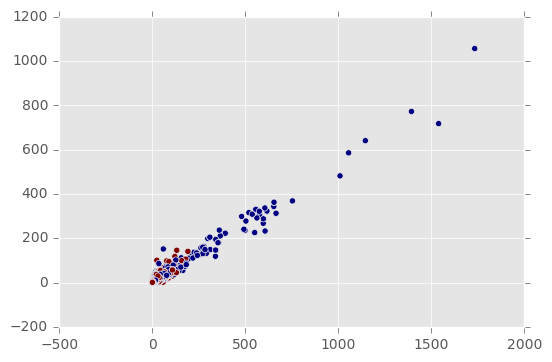

In [41]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.legend()
plt.show()